In [64]:
#pip install seaborn
#!pip install openpyxl


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [66]:
df_threats = pd.read_csv('df_threats_ss.csv', parse_dates=True)

In [67]:
df_threats.head()

,Start date,Incident type,Receiver country,Category,Initiator country,Political responses,MITRE Impact,Intelligence impact,International Law Breach Indicator,Year
0,2015-01-01,Data theft,China,Other,China,0,Data Exfiltration,5,Human rights,2015
1,2015-01-01,Data theft,United Kingdom,Government,Russia,1,Data Exfiltration,2,Cyber espionage,2015
2,2015-01-01,Data theft,China,Other,China,0,Data Exfiltration,2,Cyber espionage,2015
3,2016-01-01,Data theft,Ukraine,Other,Ukraine,0,Data Exfiltration,2,Human rights,2016
4,2017-01-01,Data theft,Netherlands,Critical Manufacturing,China,0,Data Exfiltration,3,Due diligence,2017


### 4. Category vs Intelligence Impact

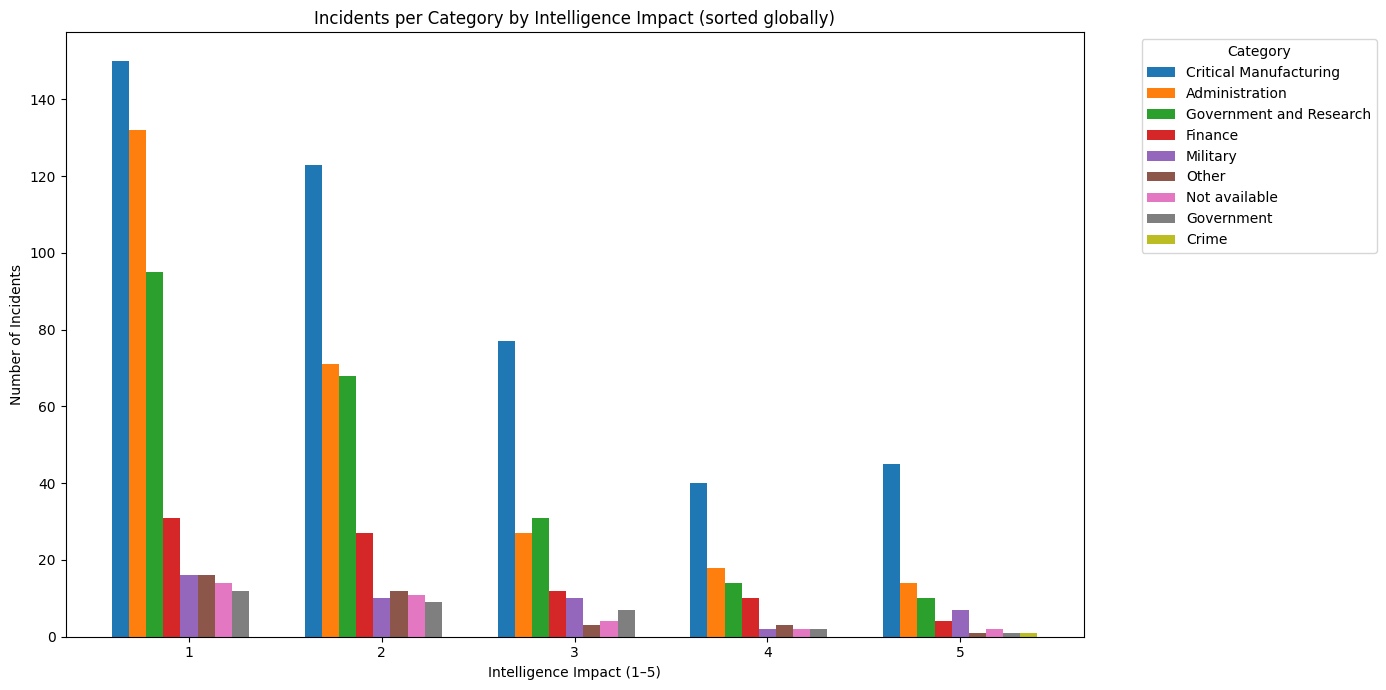

In [68]:
impact_counts = df_threats.groupby(["Intelligence impact", "Category"])["Incident type"].count().unstack(fill_value=0)
impact_counts = impact_counts[impact_counts.sum(axis=0).sort_values(ascending=False).index]

x = np.arange(len(impact_counts.index))  
width = 0.8 / len(impact_counts.columns)  

plt.figure(figsize=(14,7))
for i, category in enumerate(impact_counts.columns):
    plt.bar(x + i*width, impact_counts[category], width=width, label=category)

plt.xticks(x + width*(len(impact_counts.columns)-1)/2, impact_counts.index)
plt.xlabel("Intelligence Impact (1–5)")
plt.ylabel("Number of Incidents")
plt.title("Incidents per Category by Intelligence Impact (sorted globally)")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 5. Most vulnerable sector (by number of incidents)

<Figure size 1400x700 with 0 Axes>

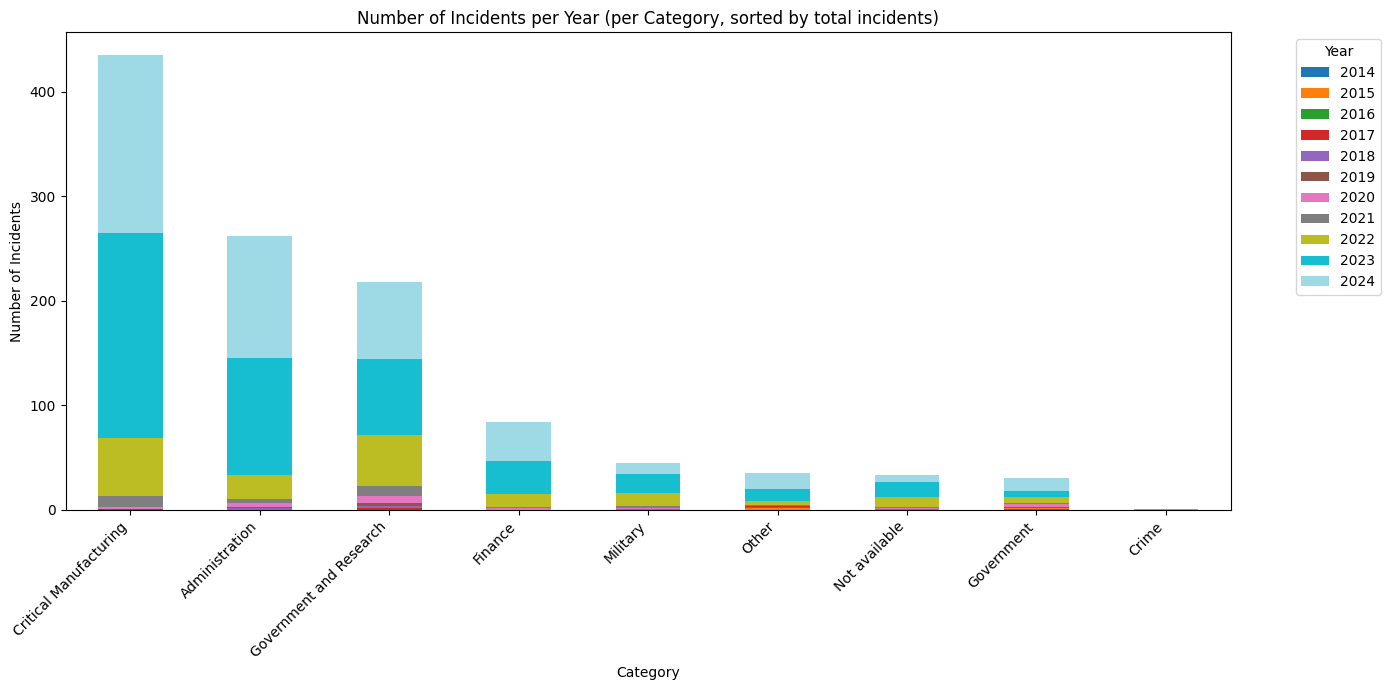

In [69]:
# Ensure datetime
df_threats["Start date"] = pd.to_datetime(df_threats["Start date"], errors="coerce")
df_threats["Year"] = df_threats["Start date"].dt.year

# Count incidents per category per year
category_counts_per_year = df_threats.groupby(["Category", "Year"])["Incident type"].count().unstack(fill_value=0)

# Sort categories by total incidents (descending)
category_counts_per_year = category_counts_per_year.loc[category_counts_per_year.sum(axis=1).sort_values(ascending=False).index]

# Plot
plt.figure(figsize=(14,7))
category_counts_per_year.plot(kind="bar", stacked=True, figsize=(14,7), colormap="tab20")
plt.title("Number of Incidents per Year (per Category, sorted by total incidents)")
plt.xlabel("Category")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Show the year with the most incidents per category
max_per_category = category_counts_per_year.idxmax(axis=1)
counts_per_category = category_counts_per_year.max(axis=1)

## 12. Average Intelligence Impact by International Law Breach

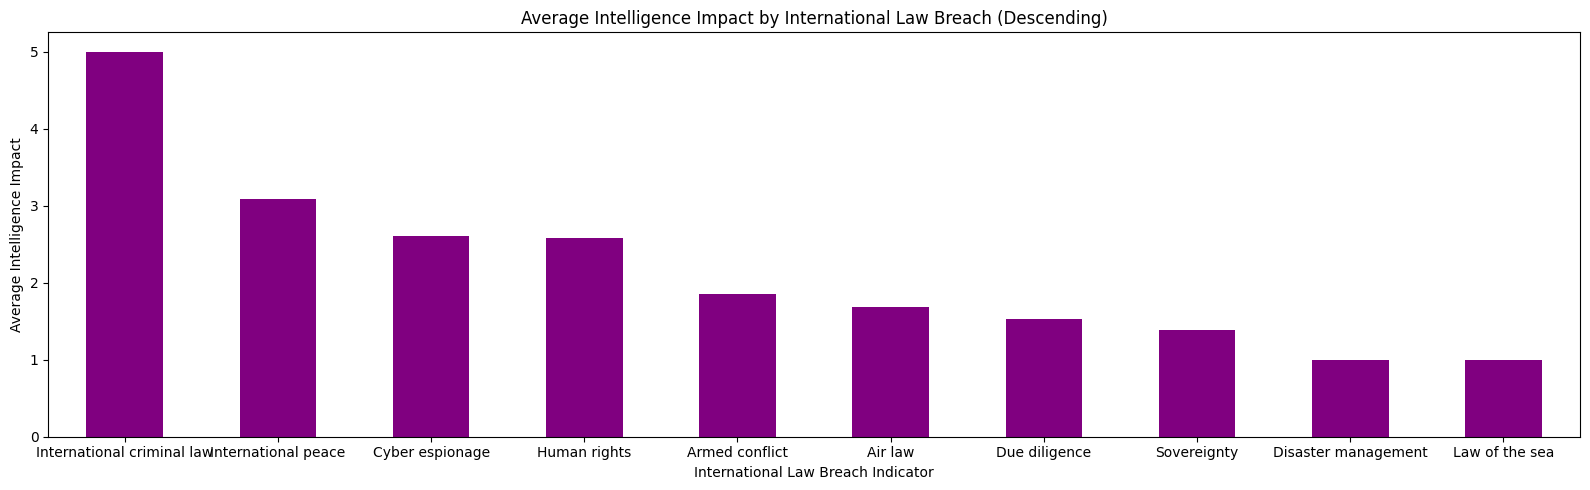

In [75]:
law_vs_impact = (
    df_threats.groupby("International Law Breach Indicator")["Intelligence impact"]
    .mean()
    .sort_values(ascending=False)   # sort descending
)

plt.figure(figsize=(16,5))
law_vs_impact.plot(kind="bar", color="purple")
plt.title("Average Intelligence Impact by International Law Breach (Descending)")
plt.ylabel("Average Intelligence Impact")
plt.xlabel("International Law Breach Indicator")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



## 14. Incident type vs MITRE Impact

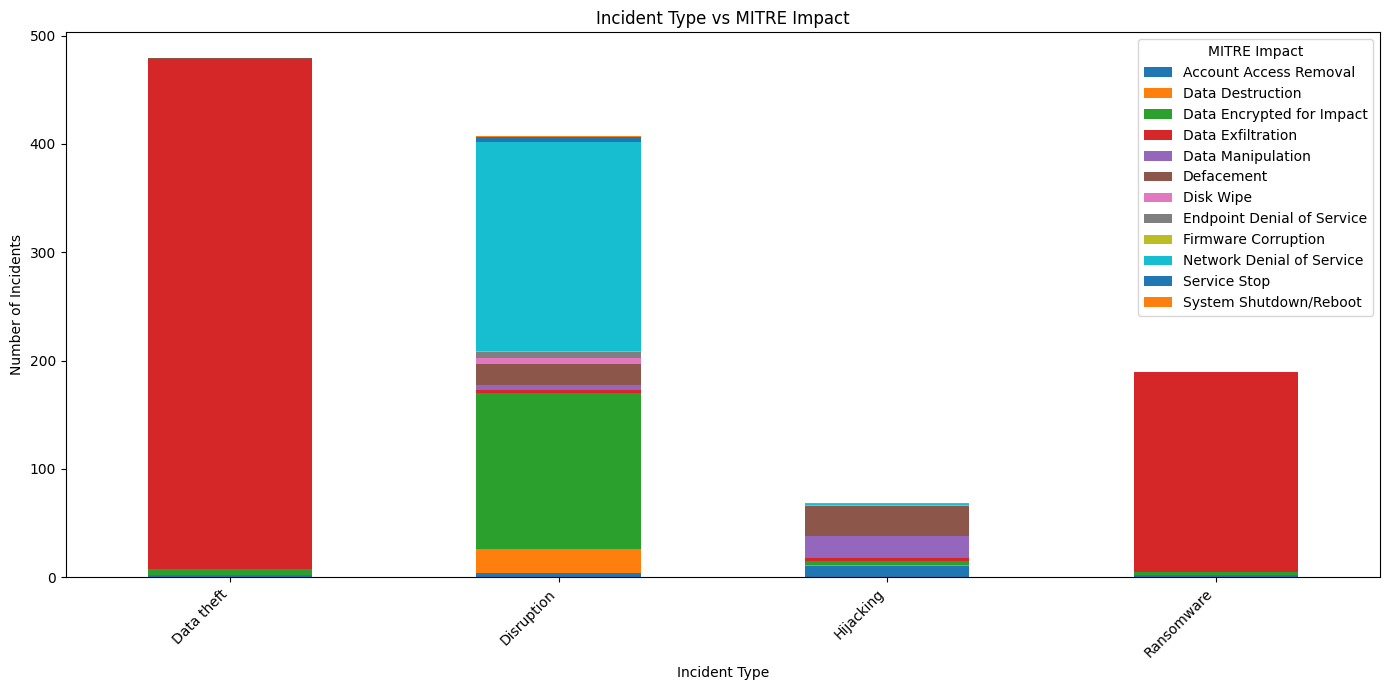

In [71]:

incident_mitre = df_threats.groupby(["Incident type", "MITRE Impact"])["Start date"].count().unstack(fill_value=0)

incident_mitre.plot(kind="bar", stacked=True, figsize=(14,7))
plt.title("Incident Type vs MITRE Impact")
plt.ylabel("Number of Incidents")
plt.xlabel("Incident Type")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


## 16. Incident type vs International Law Breach Indicator


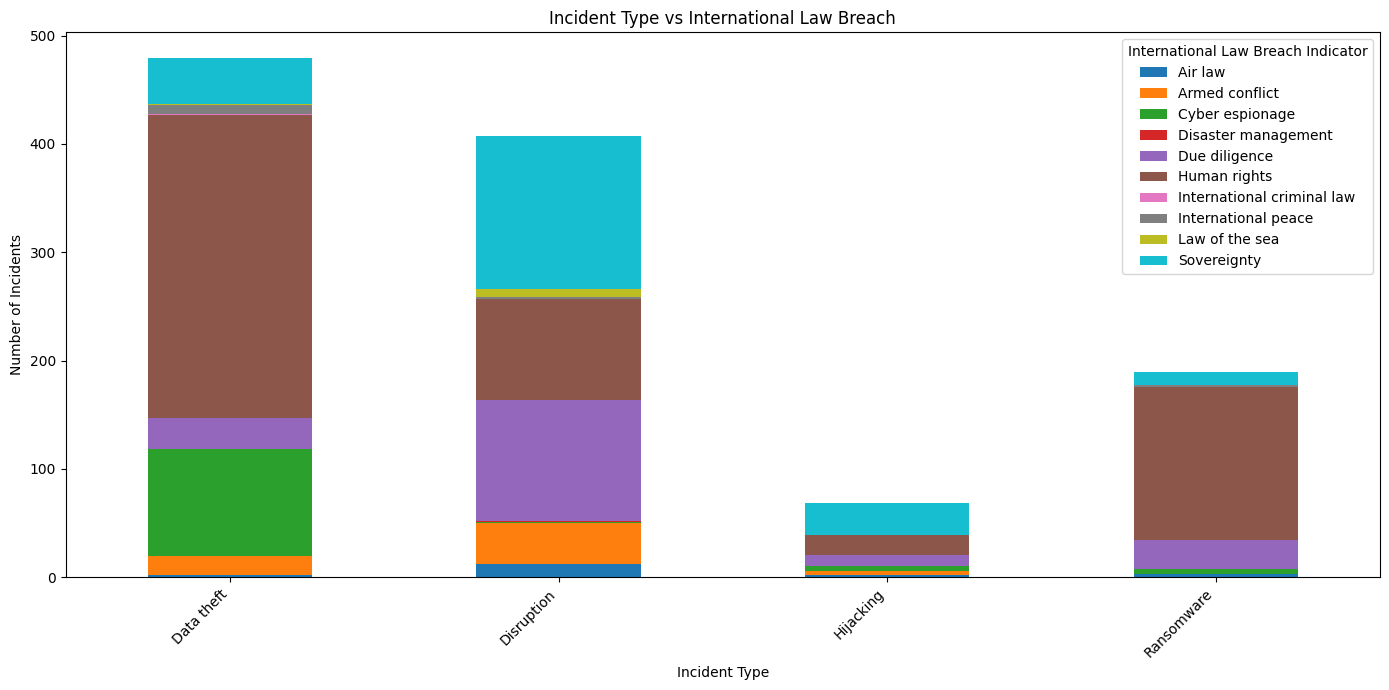

In [72]:
incident_law = df_threats.groupby(["Incident type", "International Law Breach Indicator"])["Start date"].count().unstack(fill_value=0)

incident_law.plot(kind="bar", stacked=True, figsize=(14,7))
plt.title("Incident Type vs International Law Breach")
plt.ylabel("Number of Incidents")
plt.xlabel("Incident Type")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## 17. Incident type vs Year (time trends)


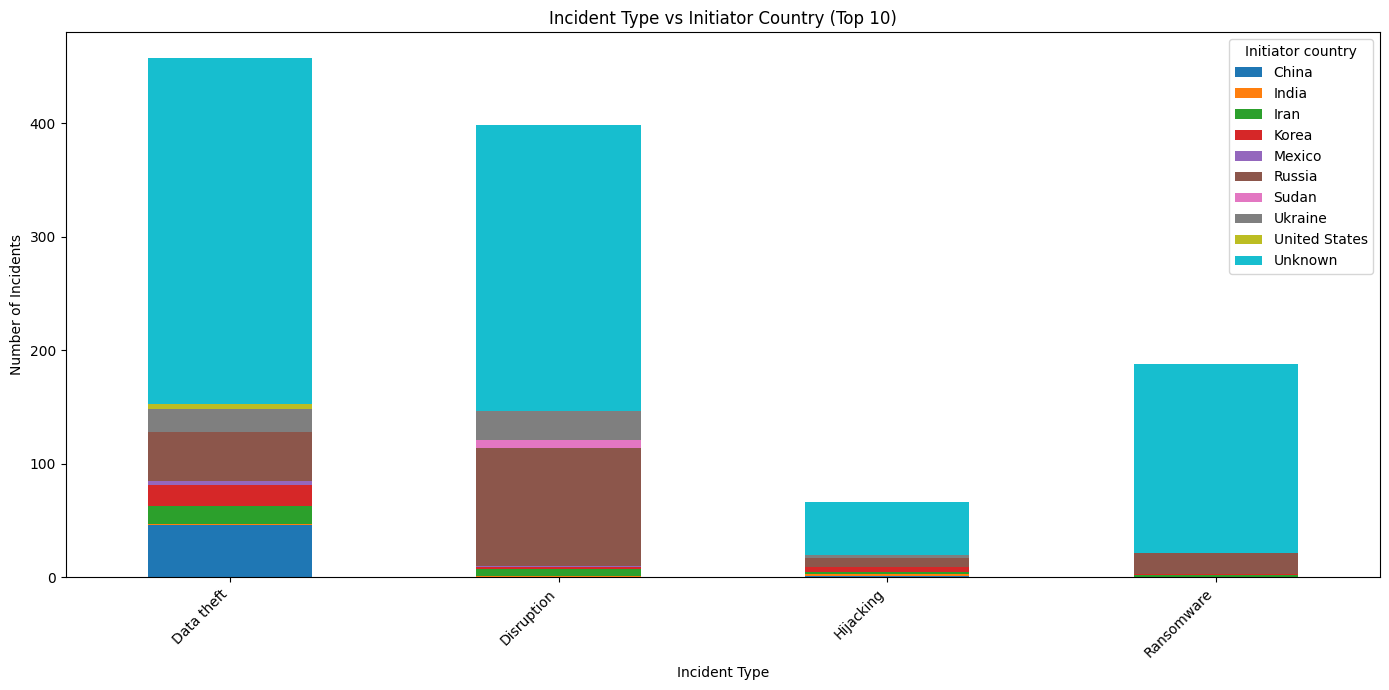

In [73]:
top_countries = df_threats["Initiator country"].value_counts().nlargest(10).index
df_top_initiators = df_threats[df_threats["Initiator country"].isin(top_countries)]

incident_initiator = df_top_initiators.groupby(["Incident type", "Initiator country"])["Start date"].count().unstack(fill_value=0)

incident_initiator.plot(kind="bar", stacked=True, figsize=(14,7))
plt.title("Incident Type vs Initiator Country (Top 10)")
plt.ylabel("Number of Incidents")
plt.xlabel("Incident Type")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## 18. Incident type vs Year (time trends)

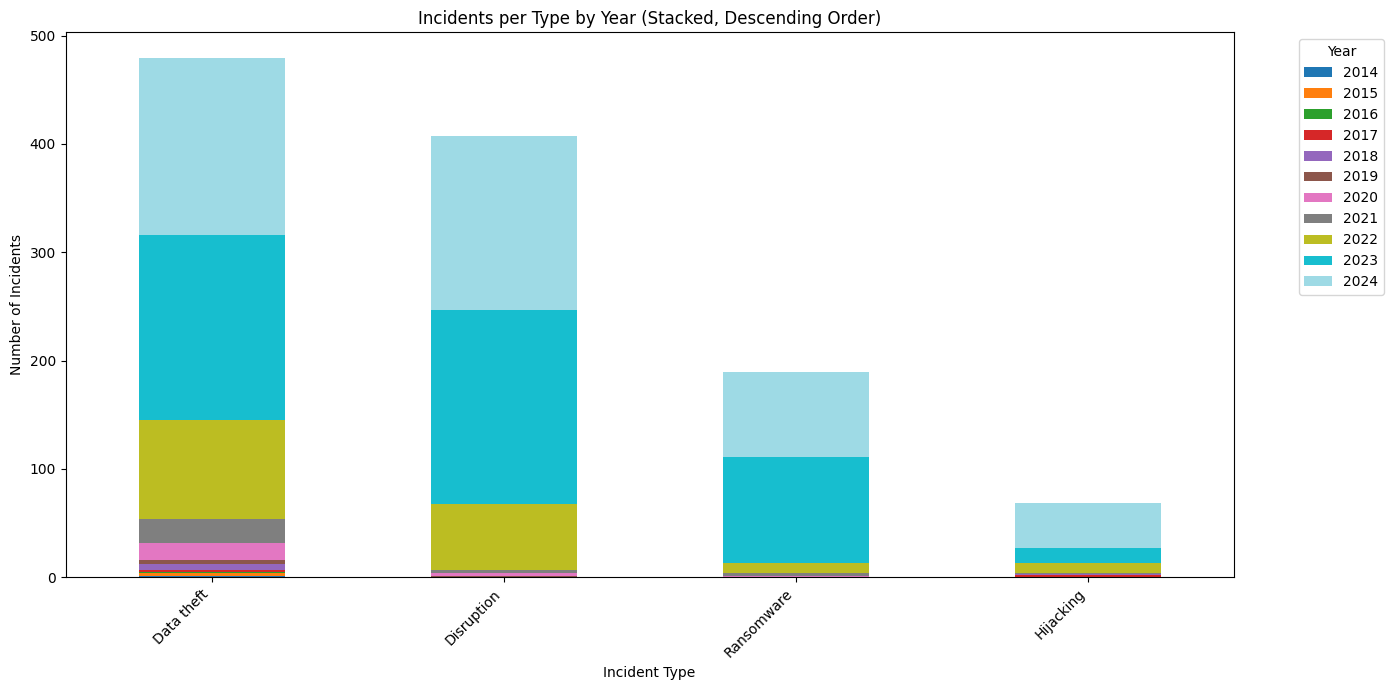

In [74]:
df_threats["Year"] = pd.to_datetime(df_threats["Start date"], errors="coerce").dt.year

# Group by Incident type and Year
incident_type_year = df_threats.groupby(["Incident type", "Year"])["Start date"].count().unstack(fill_value=0)

# Sort incident types by total number of incidents (descending)
incident_type_year = incident_type_year.loc[incident_type_year.sum(axis=1).sort_values(ascending=False).index]

# Plot stacked bar chart
incident_type_year.plot(
    kind="bar",
    stacked=True,
    figsize=(14,7),
    colormap="tab20"
)

plt.title("Incidents per Type by Year (Stacked, Descending Order)")
plt.xlabel("Incident Type")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

